In [21]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [22]:
adult = fetch_ucirepo(id=2)  
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
#print(adult.metadata) 
  
# variable information 
#print(adult.variables) 
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [23]:
whole_df = pd.concat([X,y],axis=1)
#whole_df = whole_df.replace("?", np.nan)
#whole_df_cleaned = whole_df.dropna()

In [24]:
train_df, test_df = train_test_split(whole_df, random_state=123, test_size=0.6)
train_df = train_df.replace("?", np.nan)
test_df = test_df.replace("?", np.nan)

In [25]:
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4044,19,Private,246652,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
34649,20,NaN,323309,HS-grad,9,Never-married,NaN,Own-child,Other,Male,0,0,60,South,<=50K.
48375,51,Self-emp-inc,318351,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,1741,40,United-States,<=50K.
37576,18,Self-emp-not-inc,161245,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,50,United-States,<=50K.
8211,73,Private,301210,1st-4th,2,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1735,20,United-States,<=50K


In [33]:
summary = pd.DataFrame({
    "unique value count": train_df.nunique(),
    "null count": train_df.isnull().sum()
}).T
summary

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
unique value count,72,8,14821,16,16,7,14,6,5,2,113,89,90,40,4
null count,0,1151,0,0,0,0,1153,0,0,0,0,0,0,346,0


In [34]:
train_df["income"].unique()

array(['<=50K', '<=50K.', '>50K', '>50K.'], dtype=object)

We notice that the target variable income contains inconsistent spellings(e.g., '<50K' vs '<50K.'), so we will clean these values before moving on.

In [35]:
train_df["income"] = train_df["income"].str.replace('.', '')

In [36]:
train_df.describe(include="number").round(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,19536.00,19536.00,19536.00,19536.00,19536.00,19536.00
mean,38.67,190134.46,10.08,1067.70,91.99,40.38
std,13.78,106274.65,2.59,7461.83,413.19,12.38
min,17.00,13769.00,1.00,0.00,0.00,1.00
25%,28.00,117496.00,9.00,0.00,0.00,40.00
50%,37.00,178312.00,10.00,0.00,0.00,40.00
75%,48.00,238589.25,12.25,0.00,0.00,45.00
max,90.00,1490400.00,16.00,99999.00,4356.00,99.00


According to the summary table, the numeric features vary widely in both range and scale. For example, hours-per-week ranges from 1 to 99, whereas capital-gain ranges from 0 to 99,999. This large difference in magnitude makes it necessary to apply a StandardScaler to normalize the features so that models relying on distance can compare them fairly.

Additionally, some variables such as capital-gain and capital-loss are extremely skewed, with most values concentrated near zero. We are going to the compare the distribution of the numeric features differ between the two target classes income <=50K and >50K.

In [48]:
train_df.select_dtypes(include=["number"]).columns.tolist()

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

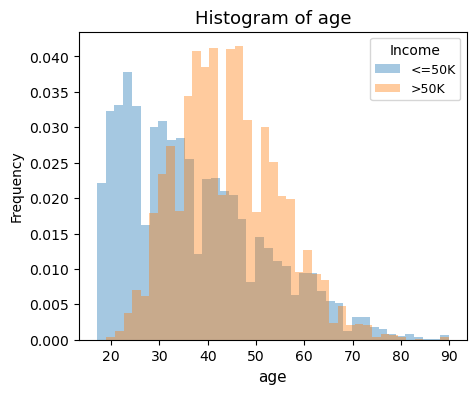

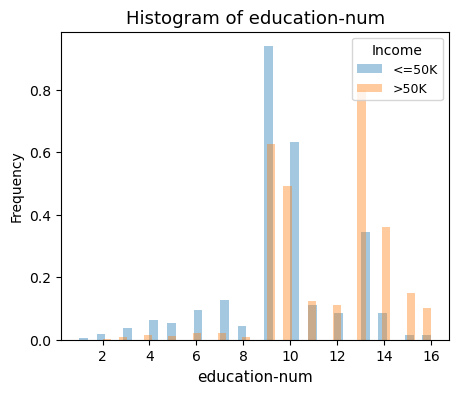

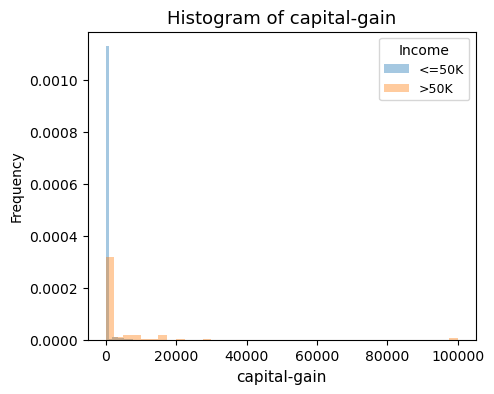

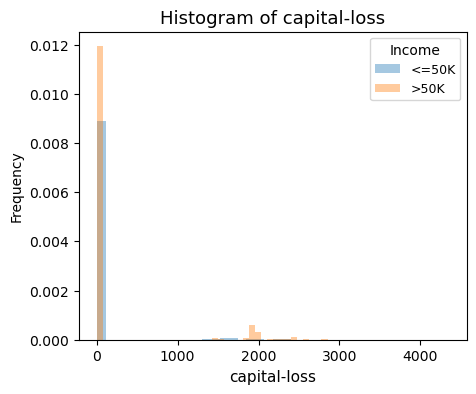

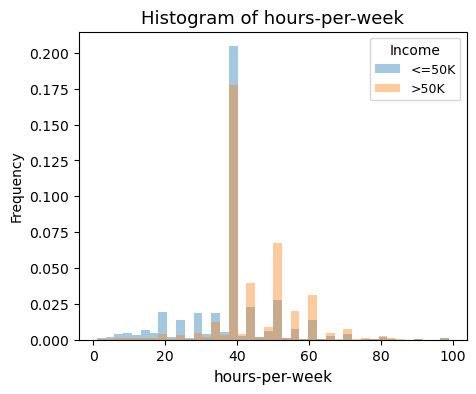

In [49]:
numeric_col_list = ['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

for feat in numeric_col_list:
    plt.figure(figsize=(5, 4))
    train_df.groupby("income")[feat].plot.hist(bins=40, alpha=0.4, legend=True, density=True)
    plt.xlabel(feat, fontsize=11)
    plt.title(f"Histogram of {feat}", fontsize=13)
    plt.legend(title="Income", fontsize=9, title_fontsize=10, loc="upper right")


    plt.show()

### Insights for Histogram of Numeric Features:

- Age: The two income groups differ clearly in their age distributions. Individuals earning >50K tend to be older, most commonly between ages 40 and 55, while the <=50K group is more spread out and skewed younger. This suggests that higher income may be linked to greater work experience.
  
- Education-num: Individuals earning >50K generally have higher education levels, indicating that formal education is an important factor associated with income.

- Capital-gain: The distribution is strongly right-skewed, with most values at zero for both groups. Non-zero values appear more often in the >50K group, and there is an extreme outlier near 100,000.

- Capital-loss: The pattern is similar to capital-gain, with almost all values at zero and slightly more non-zero observations in the >50K group.

- Hours-per-week: Individuals earning >50K tend to work longer hours, showing a clear shift toward extended working time.